In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path_datasets = "/content/performance.csv"

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('performance.csv')
df 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,higher education,higher education,at_home,teacher,...,very good,medium,high,very low,very low,good,6,5,6,6
1,GP,F,17,U,GT3,T,primary education (4th grade),primary education (4th grade),at_home,other,...,excellent,medium,medium,very low,very low,good,4,5,5,6
2,GP,F,15,U,LE3,T,primary education (4th grade),primary education (4th grade),at_home,other,...,very good,medium,low,low,medium,good,10,7,8,10
3,GP,F,15,U,GT3,T,higher education,5th to 9th grade,health,services,...,good,low,low,very low,very low,excellent,2,15,14,15
4,GP,F,16,U,GT3,T,secondary education,secondary education,other,other,...,very good,medium,low,very low,low,excellent,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,5th to 9th grade,5th to 9th grade,services,services,...,excellent,very high,high,high,very high,very good,11,9,9,9
391,MS,M,17,U,LE3,T,secondary education,primary education (4th grade),services,services,...,bad,high,very high,medium,high,bad,3,14,16,16
392,MS,M,21,R,GT3,T,primary education (4th grade),primary education (4th grade),other,other,...,excellent,very high,medium,medium,medium,good,3,10,8,7
393,MS,M,18,R,LE3,T,secondary education,5th to 9th grade,services,other,...,very good,high,very low,medium,high,excellent,0,11,12,10


Data was collected in order to save the information on particular student who earned achievement and identify patterns or trends in the data. Data was also created to create a graphical representation of the data such as charts and plots to make people easier to understand and interpret. The data was collected from students at two different schools in California, USA.


In [8]:
print(df.isnull().sum())
print(df.dtypes)
print(df.info())

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64
school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu          object
Fedu          object
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime    object
studytime     object
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      obje

In [9]:
t = ['school', 'sex', 'address', 'schoolsup', 'famsup', 'activities', 'nursery', 'internet', 'romantic']
for variable in t:
  df[variable + '_binary'] = df[variable].apply(lambda x: 1 if x == 'yes' else 0)
print(df.head())

  school sex  age address famsize Pstatus                           Medu  \
0     GP   F   18       U     GT3       A               higher education   
1     GP   F   17       U     GT3       T  primary education (4th grade)   
2     GP   F   15       U     LE3       T  primary education (4th grade)   
3     GP   F   15       U     GT3       T               higher education   
4     GP   F   16       U     GT3       T            secondary education   

                            Fedu     Mjob      Fjob  ...  G3 school_binary  \
0               higher education  at_home   teacher  ...   6             0   
1  primary education (4th grade)  at_home     other  ...   6             0   
2  primary education (4th grade)  at_home     other  ...  10             0   
3               5th to 9th grade   health  services  ...  15             0   
4            secondary education    other     other  ...  10             0   

  sex_binary address_binary  schoolsup_binary famsup_binary activities_bin

In [10]:
t = ['Medu', 'Fedu', 'reason', 'guardian', 'studytime', 'freetime', 'health']
for variable in t:
  value = {val: i + 1 for i, val in enumerate(df[variable].value_counts().index)}
  df[variable + '_ordinal'] = df[variable].map(value)
print(df.head())


  school sex  age address famsize Pstatus                           Medu  \
0     GP   F   18       U     GT3       A               higher education   
1     GP   F   17       U     GT3       T  primary education (4th grade)   
2     GP   F   15       U     LE3       T  primary education (4th grade)   
3     GP   F   15       U     GT3       T               higher education   
4     GP   F   16       U     GT3       T            secondary education   

                            Fedu     Mjob      Fjob  ... nursery_binary  \
0               higher education  at_home   teacher  ...              1   
1  primary education (4th grade)  at_home     other  ...              0   
2  primary education (4th grade)  at_home     other  ...              1   
3               5th to 9th grade   health  services  ...              1   
4            secondary education    other     other  ...              1   

  internet_binary romantic_binary Medu_ordinal  Fedu_ordinal reason_ordinal  \
0            

In [11]:
interval1 = [15, 17]
interval2 = [17, 20]
interval3 = [20, df['age'].max()]

def map_to_interval(age):
  if age in interval1:
    return 'interval1'
  elif age in interval2:
    return 'interval2'
  elif age in interval3:
    return 'interval3'

df['category_age'] = df['age'].apply(map_to_interval)
print(df.head())

  school sex  age address famsize Pstatus                           Medu  \
0     GP   F   18       U     GT3       A               higher education   
1     GP   F   17       U     GT3       T  primary education (4th grade)   
2     GP   F   15       U     LE3       T  primary education (4th grade)   
3     GP   F   15       U     GT3       T               higher education   
4     GP   F   16       U     GT3       T            secondary education   

                            Fedu     Mjob      Fjob  ... internet_binary  \
0               higher education  at_home   teacher  ...               0   
1  primary education (4th grade)  at_home     other  ...               1   
2  primary education (4th grade)  at_home     other  ...               1   
3               5th to 9th grade   health  services  ...               1   
4            secondary education    other     other  ...               0   

  romantic_binary Medu_ordinal Fedu_ordinal  reason_ordinal guardian_ordinal  \
0     

In [12]:
df['passed'] = df['G3'].apply(lambda x: 'yes' if x >= 8 else 'no')
print(df.head())

  school sex  age address famsize Pstatus                           Medu  \
0     GP   F   18       U     GT3       A               higher education   
1     GP   F   17       U     GT3       T  primary education (4th grade)   
2     GP   F   15       U     LE3       T  primary education (4th grade)   
3     GP   F   15       U     GT3       T               higher education   
4     GP   F   16       U     GT3       T            secondary education   

                            Fedu     Mjob      Fjob  ... romantic_binary  \
0               higher education  at_home   teacher  ...               0   
1  primary education (4th grade)  at_home     other  ...               0   
2  primary education (4th grade)  at_home     other  ...               0   
3               5th to 9th grade   health  services  ...               1   
4            secondary education    other     other  ...               0   

  Medu_ordinal Fedu_ordinal reason_ordinal  guardian_ordinal  \
0            1        

In [13]:
cols = ['age', 'absences', 'G1', 'G2', 'G3']
summary_stats = df[cols].describe()
print(summary_stats)
mean = df[cols].mean()
median = df[cols].median()
std = df[cols].std()
max_val = df[cols].max()
min_val = df[cols].min()





              age    absences          G1          G2          G3
count  395.000000  395.000000  395.000000  395.000000  395.000000
mean    16.696203    5.708861   10.908861   10.713924   10.415190
std      1.276043    8.003096    3.319195    3.761505    4.581443
min     15.000000    0.000000    3.000000    0.000000    0.000000
25%     16.000000    0.000000    8.000000    9.000000    8.000000
50%     17.000000    4.000000   11.000000   11.000000   11.000000
75%     18.000000    8.000000   13.000000   13.000000   14.000000
max     22.000000   75.000000   19.000000   19.000000   20.000000


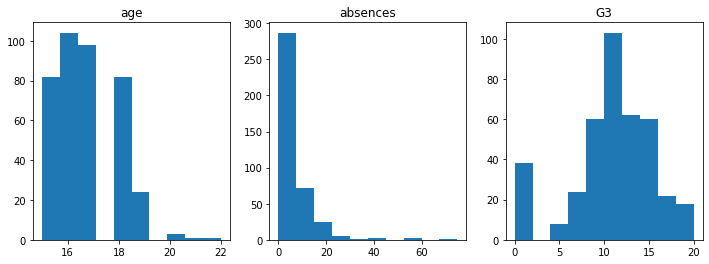

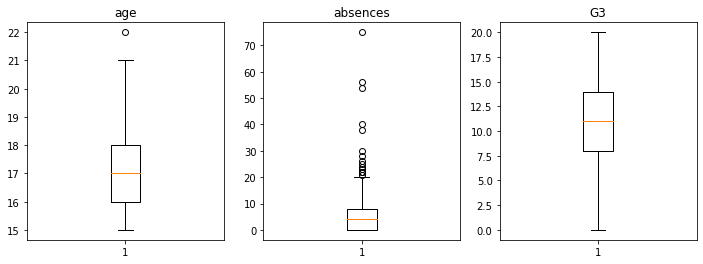

In [14]:
cols = ['age', 'absences', 'G3']

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

for i, col in enumerate(cols):
  ax[i].hist(df[col])
  ax[i].set_title(col)
plt.show()
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

for i, col in enumerate(cols):
  ax[i].boxplot(df[col])
  ax[i].set_title(col)
plt.show()





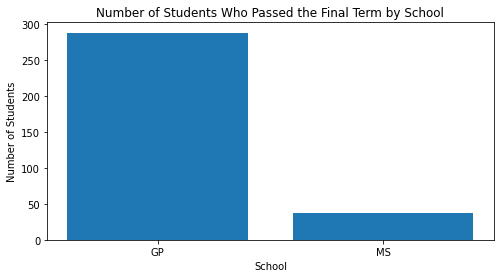

In [15]:
df['passed'] = df['G3'].apply(lambda x: 1 if x >= 8 else 0)

passed_by_school = df.groupby('school')['passed'].sum()

school_labels = passed_by_school.index

bar_heights = passed_by_school.values

plt.figure(figsize=(8, 4))

plt.bar(school_labels, bar_heights)

plt.title('Number of Students Who Passed the Final Term by School')
plt.xlabel('School')
plt.ylabel('Number of Students')

plt.show()

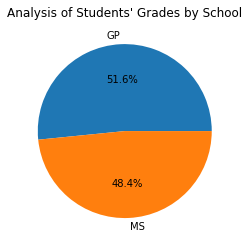

In [16]:
avg_grade_by_school = df.groupby('school')['G3'].mean()

school_labels = avg_grade_by_school.index

pie_values = avg_grade_by_school.values

plt.figure(figsize=(8, 4))

plt.pie(pie_values, labels=school_labels, autopct='%1.1f%%')

plt.title('Analysis of Students\' Grades by School')

plt.show()

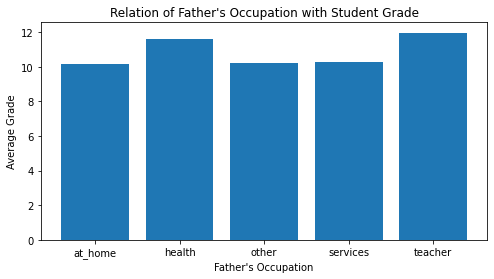

In [17]:
avg_grade_by_occupation = df.groupby('Fjob')['G3'].mean()

occupation_labels = avg_grade_by_occupation.index

bar_heights = avg_grade_by_occupation.values

plt.figure(figsize=(8, 4))

plt.bar(occupation_labels, bar_heights)

plt.title('Relation of Father\'s Occupation with Student Grade')
plt.xlabel('Father\'s Occupation')
plt.ylabel('Average Grade')

plt.show()